## Question 1 - Algorithms

In [195]:
import scipy
import scipy.sparse as sparse
import scipy.sparse.linalg as sparselinalg
import numpy as np

def residual_norm(A, b, x):
    return np.linalg.norm(A@x - b)

def general_iter(A, b, x_0, M_inv, max_iter, eps, weight=1, verbose=True):
    x = [x_0]
    r_norms = [residual_norm(A, b, x[0])]
    if verbose:
        print(f"Iter: 0: {x[0]}")
    for k in range(1, max_iter + 1):
        x.append(x[k - 1] + weight*M_inv@(b - A@x[k - 1]))
        r_norms.append(residual_norm(A, b, x[k]))
        if verbose:
            print(f"Iter: {k}: {x[k]}")
        if (r_norms[k] / np.linalg.norm(b)) < eps:
            break
    return x[-1], np.array(r_norms)

In [196]:
A = np.array([[4, -1, 1],
              [4, -8, 1],
              [-2, 1, 5]])
b = np.array([7, -21, 15])

In [197]:
np.linalg.solve(A, b)

array([2., 4., 3.])

## Jacobi

In [198]:
def jacobi(A, b, x_0, max_iter, eps, weight=1, verbose=True, is_sparse=False):
    diag = sparse.diags(A.diagonal()) if is_sparse else np.diag(A.diagonal())
    M_inv =  sparselinalg.inv(diag) if is_sparse else np.linalg.inv(diag)
    return general_iter(A, b, x_0, M_inv, max_iter, eps, weight, verbose)

In [199]:
jacobi(A, b, np.array([1, 2, 2]), 10, 1e-5)

Iter: 0: [1 2 2]
Iter: 1: [1.75  3.375 3.   ]
Iter: 2: [1.84375 3.875   3.025  ]
Iter: 3: [1.9625 3.925  2.9625]
Iter: 4: [1.990625  3.9765625 3.       ]
Iter: 5: [1.99414063 3.9953125  3.0009375 ]
Iter: 6: [1.99859375 3.9971875  2.99859375]
Iter: 7: [1.99964844 3.99912109 3.        ]
Iter: 8: [1.99978027 3.99982422 3.00003516]
Iter: 9: [1.99994727 3.99989453 2.99994727]
Iter: 10: [1.99998682 3.99996704 3.        ]


(array([1.99998682, 3.99996704, 3.        ]),
 array([1.24498996e+01, 4.01948380e+00, 6.95184328e-01, 4.66871235e-01,
        1.50730642e-01, 2.60694123e-02, 1.75076713e-02, 5.65239909e-03,
        9.77602961e-04, 6.56537674e-04, 2.11964966e-04]))

## Gauss Seidel

In [200]:
def gs(A, b, x_0, max_iter, eps, verbose=True, is_sparse=False):
    tril = sparse.tril(A) if is_sparse else np.tril(A)
    M_inv =  sparselinalg.inv(tril) if is_sparse else np.linalg.inv(tril)
    return general_iter(A, b, x_0, M_inv, max_iter, eps, 1, verbose)

In [201]:
gs(A, b, np.array([1, 2, 2]), 10, 1e-5)

Iter: 0: [1 2 2]
Iter: 1: [1.75 3.75 2.95]
Iter: 2: [1.95    3.96875 2.98625]
Iter: 3: [1.995625   3.99609375 2.99903125]
Iter: 4: [1.99926563 3.99951172 2.99980391]
Iter: 5: [1.99992695 3.99993896 2.99998299]
Iter: 6: [1.99998899 3.99999237 2.99999712]


(array([1.99998899, 3.99999237, 2.99999712]),
 array([1.24498996e+01, 1.24197423e+00, 1.86065345e-01, 1.93759324e-02,
        2.75584395e-03, 3.06032312e-04, 4.17370122e-05]))

## Steepest Descent (GD)

In [202]:
def sd(A, b, x_0, max_iter, eps, verbose=True):
    x = [x_0]
    r = [b - A@x[0]]
    if verbose:
        print(f"Iter: 0: {x[0]}")
    for k in range(1, max_iter + 1):
        A_r = A@r[k - 1]
        alpha = (r[k - 1] @ r[k - 1]) / (r[k - 1] @ A_r)
        x.append(x[k - 1] + alpha*r[k - 1])
        r.append(r[k - 1] - alpha*A_r)
        if verbose:
            print(f"Iter: {k}: {x[k]}")
        if (np.linalg.norm(r[k]) / np.linalg.norm(b)) < eps:
            break
    return x[-1], np.array([np.linalg.norm(res) for res in r])

In [203]:
sd(A.T@A, A.T@b, np.array([1, 2, 2]), 10, 1e-4)

Iter: 0: [1 2 2]
Iter: 1: [0.51751012 3.03390688 2.19529352]
Iter: 2: [1.28813479 3.2494295  2.95818764]
Iter: 3: [1.24868006 3.54511942 2.91450782]
Iter: 4: [1.59021073 3.58535757 2.87840457]
Iter: 5: [1.57316291 3.73992689 2.88940713]
Iter: 6: [1.76074475 3.75784476 2.92833536]
Iter: 7: [1.75073846 3.84811366 2.93500332]
Iter: 8: [1.86023754 3.85854309 2.95813274]
Iter: 9: [1.85439199 3.91127438 2.96202929]
Iter: 10: [1.91835644 3.91736662 2.97554282]


(array([1.91835644, 3.91736662, 2.97554282]),
 array([100.76209605,  21.58977132,  22.75744646,   9.71048244,
         11.40503664,   5.39774527,   6.66222023,   3.15312353,
          3.8917987 ,   1.84192681,   2.27343088]))

## Conjugate Gradients (CG)

In [204]:
def cg(A, b, x_0, max_iter, eps, verbose=True):
    x = [x_0]
    r = [b - A@x[0]]
    p = [r[0]]
    if verbose:
        print(f"Iter: 0: {x[0]}")
    for k in range(1, max_iter + 1):
        A_p = A@p[k - 1]
        alpha = (r[k - 1] @ p[k - 1]) / (p[k - 1] @ A_p)
        x.append(x[k - 1] + alpha*p[k - 1])
        r.append(r[k - 1] - alpha*A_p)
        if verbose:
            print(f"Iter: {k}: {x[k]}")
        if (np.linalg.norm(r[k]) / np.linalg.norm(b)) < eps:
            break
        
        beta = (r[k] @ r[k]) / (r[k - 1] @ r[k - 1])
        p.append(r[k] + beta*p[k - 1])
    return x[-1], np.array([np.linalg.norm(res) for res in r])

In [205]:
cg(A.T@A, A.T@b, np.array([1, 2, 2]), 3, 1e-4)

Iter: 0: [1 2 2]
Iter: 1: [0.51751012 3.03390688 2.19529352]
Iter: 2: [1.36227322 3.57091357 3.20473382]
Iter: 3: [2. 4. 3.]


(array([2., 4., 3.]),
 array([1.00762096e+02, 2.15897713e+01, 1.21045358e+01, 1.44464889e-13]))

## Question 1 - Section B

In [230]:
from scipy.sparse import random

n = 256
A = random(n, n, 5 / n, dtype=float)
v = np.random.rand(n)
v = sparse.spdiags(v, 0, v.shape[0], v.shape[0], 'csr')
A = A.transpose() * v * A + 0.1*sparse.eye(n)
b = np.random.rand(n)

In [231]:
x_jacobi, res_jacobi = jacobi(A, b, np.zeros(n), 100, 1e-15, weight=0.35, verbose=False, is_sparse=True)

C:\Users\Maor\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
C:\Users\Maor\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [232]:
x_gs, res_gs = gs(A, b, np.zeros(n), 100, 1e-15, verbose=False, is_sparse=True)

In [233]:
x_sd, res_sd = sd(A, b, np.zeros(n), 100, 1e-15, verbose=False)

In [234]:
x_cg, res_cg = cg(A, b, np.zeros(n), 100, 1e-15, verbose=False)

(Jacobi w=0.35) Residual Norm:       0.05202514826544867
(Gauss Seidel) Residual Norm:        9.475768316373202e-09
(Steepest Descent) Residual Norm:    0.1294911476894247
(Conjugate Gradients) Residual Norm: 5.414264003190013e-14


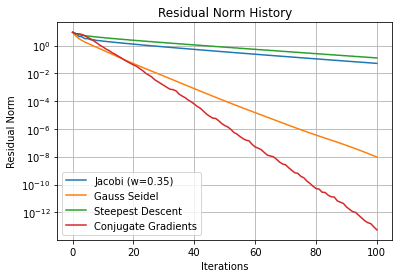

In [241]:
import matplotlib.pyplot as plt
plt.semilogy(res_jacobi, label="Jacobi (w=0.35)")
plt.semilogy(res_gs, label="Gauss Seidel")
plt.semilogy(res_sd, label="Steepest Descent")
plt.semilogy(res_cg, label="Conjugate Gradients")
plt.xlabel("Iterations")
plt.ylabel("Residual Norm")
plt.title("Residual Norm History")
plt.legend()
plt.grid()

print(f"(Jacobi w=0.35) Residual Norm:       {res_jacobi[-1]}")
print(f"(Gauss Seidel) Residual Norm:        {res_gs[-1]}")
print(f"(Steepest Descent) Residual Norm:    {res_sd[-1]}")
print(f"(Conjugate Gradients) Residual Norm: {res_cg[-1]}")

In [236]:
cf_jacobi = res_jacobi[1:] / res_jacobi[:-1]
cf_gs = res_gs[1:] / res_gs[:-1]
cf_sd = res_sd[1:] / res_sd[:-1]
cf_cg = res_cg[1:] / res_cg[:-1]

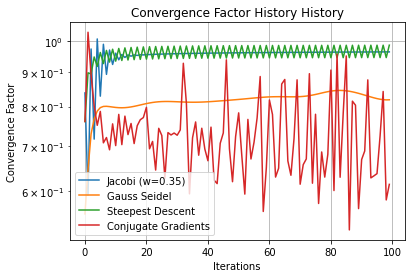

In [242]:
import matplotlib.pyplot as plt
plt.semilogy(cf_jacobi, label="Jacobi (w=0.35)")
plt.semilogy(cf_gs, label="Gauss Seidel")
plt.semilogy(cf_sd, label="Steepest Descent")
plt.semilogy(cf_cg, label="Conjugate Gradients")
plt.xlabel("Iterations")
plt.ylabel("Convergence Factor")
plt.title("Convergence Factor History History")
plt.legend()
plt.grid()

## Question 3 - Section C

In [187]:
import scipy
import scipy.sparse as sparse
import scipy.sparse.linalg as sparselinalg
import numpy as np

In [188]:
A = np.array([[ 5,  4,  4, -1,  0],
              [ 3, 12,  4, -5, -5],
              [-4,  2,  6,  0,  3],
              [ 4,  5, -7, 10,  2],
              [ 1,  2,  5,  3, 10]])
b = np.array([1, 1, 1, 1, 1])

In [191]:
def gmres(A, b, x_0, max_iter, eps, verbose=True):
    x = [x_0]
    r = [b - A@x[0]]
    if verbose:
        print(f"Iter: 0: {x[0]}")
    for k in range(1, max_iter + 1):
        A_r = A@r[k - 1]
        alpha = (r[k - 1] @ A_r) / (A_r @ A_r)
        x.append(x[k - 1] + alpha*r[k - 1])
        r.append(r[k - 1] - alpha*A_r)
        if verbose:
            print(f"Iter: {k}: {x[k]}")
        if (np.linalg.norm(r[k]) / np.linalg.norm(b)) < eps:
            break
    return x[-1], np.array([np.linalg.norm(res) for res in r])

In [192]:
x_gmres, res_gmres = gmres(A, b, np.zeros(5), 50, 1e-10, verbose=False)
x_sd, res_sd = sd(A, b, np.zeros(5), 50, 1e-10, verbose=False)

GMRES: 1.3305284898270647e-08


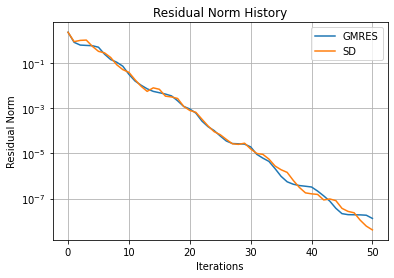

In [194]:
import matplotlib.pyplot as plt
plt.semilogy(res_gmres, label="GMRES")
plt.semilogy(res_sd, label="SD")

plt.xlabel("Iterations")
plt.ylabel("Residual Norm")
plt.title("Residual Norm History")
plt.legend()
plt.grid()

print(f"GMRES: {res_gmres[-1]}")

## Question 4 - Section A

In [158]:
L = np.array([[2, -1, -1,0,0,0,0,0,0,0],
             [-1,2,-1,0,0,0,0,0,0,0],
             [-1,-1,3,-1,0,0,0,0,0,0],
             [0,0,-1,5,-1,0,-1,0,-1,-1],
             [0,0,0,-1,4,-1,-1,-1,0,0],
             [0,0,0,0,-1,3,-1,-1,0,0],
             [0,0,0,-1,-1,-1,5,-1,0,-1],
             [0,0,0,0,-1,-1,-1,4,0,-1],
             [0,0,0,-1,0,0,0,0,2,-1],
             [0,0,0,-1,0,0,-1,-1,-1,4]])
b = np.array([1,-1,1,-1,1,-1,1,-1,1,-1])
x0 = np.zeros(10)

In [159]:
x_jacobi, res_jacobi = jacobi(L, b, x0, 1000, 1e-5, verbose=False, is_sparse=False)

Final Residual: 2.9189073430572584e-05
Number of Iterations: 74


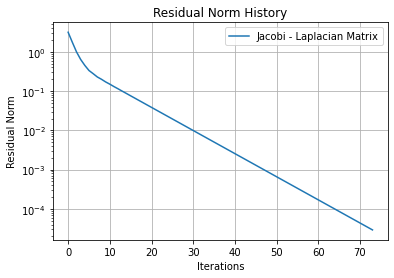

In [160]:
import matplotlib.pyplot as plt
plt.semilogy(res_jacobi, label="Jacobi - Laplacian Matrix")
plt.xlabel("Iterations")
plt.ylabel("Residual Norm")
plt.title("Residual Norm History")
plt.legend()
plt.grid()

print(f"Final Residual: {res_jacobi[-1]}")
print(f"Number of Iterations: {len(res_jacobi)}")

In [161]:
cf_jacobi = res_jacobi[1:] / res_jacobi[:-1]

(Jacobi) Convergence Factor: 0.8732094848469012


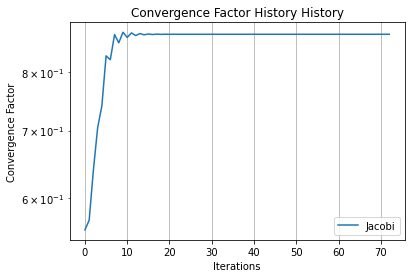

In [173]:
import matplotlib.pyplot as plt
plt.semilogy(cf_jacobi, label="Jacobi")
plt.xlabel("Iterations")
plt.ylabel("Convergence Factor")
plt.title("Convergence Factor History History")
plt.legend()
plt.grid()

print(f"(Jacobi) Convergence Factor: {cf_jacobi[-1]}")

In [172]:
x_jacobi

array([ 1.24961406,  0.58294739,  0.91629384, -0.08366525, -0.09122885,
       -0.59311994, -0.13857749, -0.54956007,  0.2705072 , -0.3753224 ])

## Question 4 - Section B

In [181]:
def preconditioned_jacobi(A, b, x_0, max_iter, eps, weight=1, verbose=True):
    M1 = A[0:3, 0:3]
    M2 = A[3:10,3:10]
    Minv = np.zeros_like(A, dtype=np.float32)
    Minv[0:3, 0:3] = np.linalg.inv(M1)
    Minv[3:10,3:10] = np.linalg.inv(M2)
    return general_iter(A, b, x_0, Minv, max_iter, eps, weight, verbose)

In [182]:
x_prec_jacobi, res_prec_jacobi = preconditioned_jacobi(L, b, x0, 1000, 1e-5, weight=0.65, verbose=False)

(Jacobi) Final Residual: 2.9189073430572584e-05
(Jacobi) Number of Iterations: 74
(Preconditioned Jacobi) Final Residual: 2.742306150967764e-05
(Preconditioned Jacobi) Number of Iterations: 12


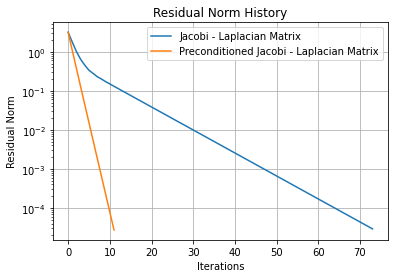

In [183]:
import matplotlib.pyplot as plt
plt.semilogy(res_jacobi, label="Jacobi - Laplacian Matrix")
plt.semilogy(res_prec_jacobi, label="Preconditioned Jacobi - Laplacian Matrix")
plt.xlabel("Iterations")
plt.ylabel("Residual Norm")
plt.title("Residual Norm History")
plt.legend()
plt.grid()

print(f"(Jacobi) Final Residual: {res_jacobi[-1]}")
print(f"(Jacobi) Number of Iterations: {len(res_jacobi)}")
print(f"(Preconditioned Jacobi) Final Residual: {res_prec_jacobi[-1]}")
print(f"(Preconditioned Jacobi) Number of Iterations: {len(res_prec_jacobi)}")

In [184]:
cf_jacobi = res_jacobi[1:] / res_jacobi[:-1]
cf_prec_jacobi = res_prec_jacobi[1:] / res_prec_jacobi[:-1]

(Jacobi) Convergence Factor: 0.8732094848469012
(Preconditioned Jacobi) Convergence Factor: 0.3494740313928122


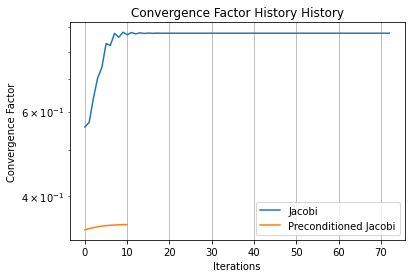

In [185]:
import matplotlib.pyplot as plt
plt.semilogy(cf_jacobi, label="Jacobi")
plt.semilogy(cf_prec_jacobi, label="Preconditioned Jacobi")

plt.xlabel("Iterations")
plt.ylabel("Convergence Factor")
plt.title("Convergence Factor History History")
plt.legend()
plt.grid()

print(f"(Jacobi) Convergence Factor: {cf_jacobi[-1]}")
print(f"(Preconditioned Jacobi) Convergence Factor: {cf_prec_jacobi[-1]}")

In [186]:
x_prec_jacobi

array([ 0.833331  ,  0.16667077,  0.50000089, -0.65909026, -0.19886743,
       -0.6534085 , -0.28409388, -0.50000089, -0.06250511, -0.62499968])

## Question 4 - Section C

In [175]:
L = np.array([[2, -1, -1,0,0,0,0,0,0,0],
             [-1,2,-1,0,0,0,0,0,0,0],
             [-1,-1,3,0,0,0,0,-1,0,0],
             [0,0,0,4,-1,-1,-1,-1,0,0],
             [0,0,0,-1,3,-1,-1,0,0,0],
             [0,0,0,-1,-1,5,-1,-1,0,-1],
             [0,0,0,-1,-1,-1,4,0,0,-1],
             [0,0,-1,-1,0,-1,0,5,-1,-1],
             [0,0,0,0,0,0,0,-1,2,-1],
             [0,0,0,0,0,-1,-1,-1,-1,4]])

b = np.array([1,-1,1,-1,1,-1,1,-1,1,-1])
x0 = np.zeros(10)

In [176]:
def preconditioned2_jacobi(A, b, x_0, max_iter, eps, weight=1, verbose=True):
    M1 = A[0:3, 0:3]
    M2 = A[3:7,3:7]
    M3 = A[7:10, 7:10]
    Minv = np.zeros_like(A, dtype=np.float32)
    Minv[0:3, 0:3] = np.linalg.inv(M1)
    Minv[3:7, 3:7] = np.linalg.inv(M2)
    Minv[7:10, 7:10] = np.linalg.inv(M3)
    return general_iter(A, b, x_0, Minv, max_iter, eps, weight, verbose)

In [177]:
x_prec2_jacobi, res_prec2_jacobi = preconditioned2_jacobi(L, b, x0, 1000, 1e-5, weight=0.69, verbose=False)

(Jacobi) Final Residual: 2.9189073430572584e-05
(Jacobi) Number of Iterations: 74
(Preconditioned (3,7) Jacobi) Final Residual: 2.742292947714525e-05
(Preconditioned (3,7) Jacobi) Number of Iterations: 12
(Preconditioned (3,4,3) Jacobi) Final Residual: 3.106735983143885e-05
(Preconditioned (3,4,3) Jacobi) Number of Iterations: 17


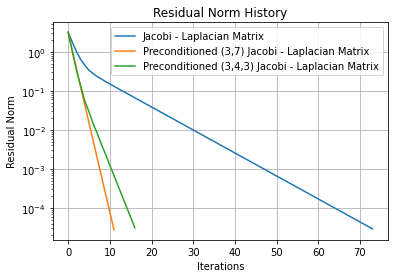

In [178]:
import matplotlib.pyplot as plt
plt.semilogy(res_jacobi, label="Jacobi - Laplacian Matrix")
plt.semilogy(res_prec_jacobi, label="Preconditioned (3,7) Jacobi - Laplacian Matrix")
plt.semilogy(res_prec2_jacobi, label="Preconditioned (3,4,3) Jacobi - Laplacian Matrix")
plt.xlabel("Iterations")
plt.ylabel("Residual Norm")
plt.title("Residual Norm History")
plt.legend()
plt.grid()

print(f"(Jacobi) Final Residual: {res_jacobi[-1]}")
print(f"(Jacobi) Number of Iterations: {len(res_jacobi)}")
print(f"(Preconditioned (3,7) Jacobi) Final Residual: {res_prec_jacobi[-1]}")
print(f"(Preconditioned (3,7) Jacobi) Number of Iterations: {len(res_prec_jacobi)}")
print(f"(Preconditioned (3,4,3) Jacobi) Final Residual: {res_prec2_jacobi[-1]}")
print(f"(Preconditioned (3,4,3) Jacobi) Number of Iterations: {len(res_prec2_jacobi)}")

In [179]:
cf_prec2_jacobi = res_prec2_jacobi[1:] / res_prec2_jacobi[:-1]

(Jacobi) Convergence Factor: 0.8732094848469012
(Preconditioned (3,7) Jacobi) Convergence Factor: 0.3494737568735444
(Preconditioned (3,4,3) Jacobi) Convergence Factor: 0.5389014079569912


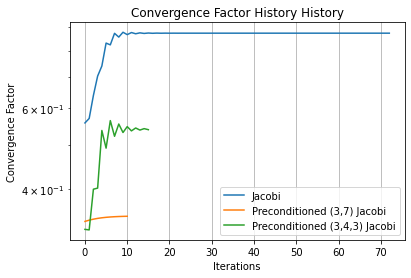

In [180]:
import matplotlib.pyplot as plt
plt.semilogy(cf_jacobi, label="Jacobi")
plt.semilogy(cf_prec_jacobi, label="Preconditioned (3,7) Jacobi")
plt.semilogy(cf_prec2_jacobi, label="Preconditioned (3,4,3) Jacobi")


plt.xlabel("Iterations")
plt.ylabel("Convergence Factor")
plt.title("Convergence Factor History History")
plt.legend()
plt.grid()

print(f"(Jacobi) Convergence Factor: {cf_jacobi[-1]}")
print(f"(Preconditioned (3,7) Jacobi) Convergence Factor: {cf_prec_jacobi[-1]}")
print(f"(Preconditioned (3,4,3) Jacobi) Convergence Factor: {cf_prec2_jacobi[-1]}")

In [155]:
x_prec2_jacobi

array([ 1.28332111,  0.61665444,  0.94998778, -0.20909093,  0.25113939,
       -0.20340606,  0.16591516, -0.05000405,  0.38750103, -0.17499389])

In [156]:
x_prec_jacobi

array([ 0.833331  ,  0.16667077,  0.50000089, -0.50000089, -0.50757657,
       -1.00946566, -0.5549246 , -0.96590548, -0.14583764, -0.79166474])

In [157]:
x_jacobi

array([ 1.24961406,  0.58294739,  0.91629384, -0.08366525, -0.09122885,
       -0.59311994, -0.13857749, -0.54956007,  0.2705072 , -0.3753224 ])